Теперь нам нужно визуализировать данные, полученные и изпользовавшиеся в предыдущей лабораторной на карте. 

---

Начнём с установки и подключения geopandas

In [1]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 921kB 8.5MB/s 
     |████████████████████████████████| 11.8MB 199kB/s 
     |████████████████████████████████| 10.1MB 23.7MB/s 


Далее выгружаем файл, содержащий данные о координатах округов Санкт-Петербурга:

In [3]:
from google.colab import files
uploaded = files.upload()


Saving admin_level_8_geojson.geojson to admin_level_8_geojson.geojson


In [0]:
%matplotlib inline
mo = gpd.read_file('admin_level_8_geojson.geojson')

Теперь нам нужно из сводного массива данных по городу, выбрать геометрические позиции только тех округов, которые относятся к Красногвардейскому району. 

In [26]:
krasnogv = mo[(mo.name == 'округ Ржевка') | (mo.name == 'округ Полюстрово') | (mo.name == 'округ Большая Охта') | \
       (mo.name == 'округ Малая Охта') | (mo.name == 'округ Пороховые')] 
krasnogv = krasnogv[['name', 'geometry']]
krasnogv_win = krasnogv
krasnogv_zh = krasnogv
krasnogv

,name,geometry
382,округ Малая Охта,"MULTIPOLYGON (((30.44864 59.93848, 30.44840 59..."
490,округ Пороховые,"MULTIPOLYGON (((30.50775 59.94562, 30.50512 59..."
3923,округ Ржевка,"MULTIPOLYGON (((30.56533 59.97092, 30.56477 59..."
12395,округ Большая Охта,"MULTIPOLYGON (((30.44636 59.96046, 30.43920 59..."
12397,округ Полюстрово,"MULTIPOLYGON (((30.49614 59.99037, 30.49451 59..."


Следующим шагом подключим необходимые для работы модули и позаимствуем часть кода из предыдущей лабораторной (по сбору данных, относящихся к статистике по УИКам Красногвардейского района)

In [0]:
import pandas as pd
import requests

In [0]:
tic4 = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217422&type=222"
tic25 = "http://www.st-petersburg.vybory.izbirkom.ru/region/region/st-petersburg?action=show&tvd=27820001217417&vrn=27820001217413&region=78&global=&sub_region=78&prver=0&pronetvd=null&vibid=27820001217443&type=222"

def parser(url):
  response = requests.get(url)
  icom = pd.read_html(url, encoding='cp1251', header = 0)[7]
  icom.drop([1],inplace = True)
  for i in range(icom.shape[1]): 
    icom.iloc[1,i] = int(icom.iloc[1,i]) + int(icom.iloc[2,i]) 
    for j in range(3):
      icom.iloc[(11+j),i] = (icom.iloc[(11+j),i]).split()[1] 
  icom.drop([int(k) for k in range(3,12)], inplace = True)
  return(icom)
    
icomps1 = parser(tic4)
icomps2 = parser(tic25)

#print(icomps1)
#print(icomps2)

Следующие блоки содержат, опять же, часть программы предыдущей лабораторной, но дополнительно мы еще соберём данные по количеству населения отдельных округов Красногвардейского района. Ну, а из прошлой лабораторной возьмем подсчёт статистики явки по УИКам и распределению голосов между кандидатами.

In [0]:
procent_appearence = []
procent_appearence1 = []
procent_appearence2 = []
zhitely = []
for i in range(icomps1.shape[1]): 
    procent = int(icomps1.iloc[1, i])/(int(icomps1.iloc[0,i]))
    procent_appearence1.append(procent*100)
    zhitely.append(int(icomps1.iloc[0,i]))
   
for i in range(icomps2.shape[1]): 
    procent = int(icomps2.iloc[1, i])/(int(icomps2.iloc[0,i]))
    procent_appearence2.append(procent*100)
    zhitely.append(int(icomps2.iloc[0,i]))
    
procent_appearence = procent_appearence1 + procent_appearence2
#print(procent_appearence)

In [0]:
Amosov = []
Beglov = []
Tikhonova = []
appearence = []
for i in range(icomps1.shape[1]):
    Amosov.append(float(icomps1.iloc[2, i].split("%")[0]))
    Beglov.append(float(icomps1.iloc[3, i].split("%")[0]))
    Tikhonova.append(float(icomps1.iloc[4, i].split("%")[0]))
    appearence.append(int(icomps1.iloc[0,i]))
for i in range(icomps2.shape[1]):
    Amosov.append(float(icomps2.iloc[2, i].split("%")[0]))
    Beglov.append(float(icomps2.iloc[3, i].split("%")[0]))
    Tikhonova.append(float(icomps2.iloc[4, i].split("%")[0]))
    appearence.append(int(icomps2.iloc[0,i]))

Теперь нам нужно разделить сводные данные со всего района по отдельным округам, ранее выбранных чуть выше. Это необходимо для дальнейшей визуализации на карте результатов и некоторых статистик по отдельным округам как частям Красногвардейского района. 

---
Что мы делаем в следующем блоке?
Собираем информацию по округам касательно населения, процента явки и победителя среди кандидатов отдельно по каждому из округов, таких как Малая Охта, Большая Охта, Ржевка, Пороховые и Полюстрово.  





In [0]:
krsn_procent_appearence = []
winner_okrug = []
population = []

def po_okrugam(a,b,c,d):
  appearence_okrug = 0
  okrug = 0
  okrug_sum_Amosov=0
  okrug_sum_Beglov=0
  okrug_sum_Tikhonova=0
  okrug_popul=0
  if (d>0):
    for i in range(c,d):
      appearence_okrug += procent_appearence[i] 
      okrug += 1
      okrug_popul += zhitely[i] 
      if (Amosov[i]>Beglov[i]) & (Amosov[i]>Tikhonova[i]):
        okrug_sum_Amosov += 1
      if (Beglov[i]>Amosov[i]) & (Beglov[i]>Tikhonova[i]):  
        okrug_sum_Beglov += 1
      if (Tikhonova[i]>Beglov[i]) & (Tikhonova[i]>Amosov[i]):  
        okrug_sum_Tikhonova += 1
  for i in range(a,b):
    appearence_okrug += procent_appearence[i] 
    okrug += 1
    okrug_popul += zhitely[i] 
    if (Amosov[i]>Beglov[i]) & (Amosov[i]>Tikhonova[i]):
      okrug_sum_Amosov += 1
    if (Beglov[i]>Amosov[i]) & (Beglov[i]>Tikhonova[i]):  
      okrug_sum_Beglov += 1
    if (Tikhonova[i]>Beglov[i]) & (Tikhonova[i]>Amosov[i]):  
      okrug_sum_Tikhonova += 1
  if (okrug_sum_Amosov > okrug_sum_Beglov) & (okrug_sum_Amosov > okrug_sum_Tikhonova):
    winner_okrug.append('Амосов')
  if (okrug_sum_Beglov > okrug_sum_Amosov) & (okrug_sum_Beglov > okrug_sum_Tikhonova):
    winner_okrug.append('Беглов')
  if (okrug_sum_Tikhonova > okrug_sum_Beglov) & (okrug_sum_Tikhonova > okrug_sum_Amosov):
    winner_okrug.append('Тихонова') 
  population.append(okrug_popul)  
  krsn_procent_appearence.append(int(appearence_okrug / okrug))
     
po_okrugam(40,57,0,0)     
po_okrugam(20,40,57,59) 
po_okrugam(65,116,0,0) 
po_okrugam(116,140,0,0) 
po_okrugam(0,20,59,65)         
#print(krsn_procent_appearence)
#print(winner_okrug)
#print(population) 

Приступаем к визуализации.

---
Для начала просто покажем на карте **расположение отдельных округов района**.


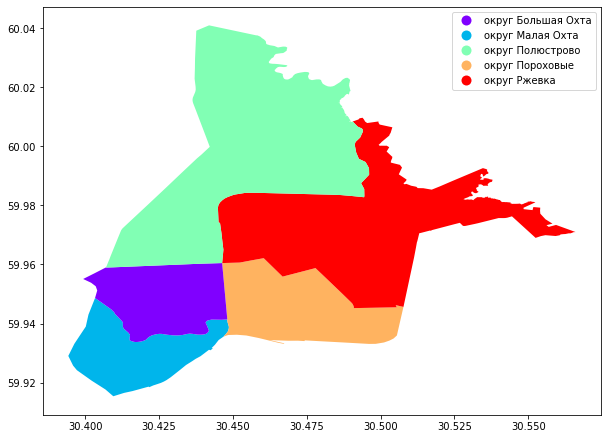

In [49]:
krasnogvardeysky_map = gpd.GeoDataFrame(krasnogv)
krasnogvardeysky_map.plot(column = 'name',  cmap='rainbow', legend=True, figsize=[10,10])

Далее составим табличку для удобного отображения данных по количеству населения,явке и победителю по голосам отдельных округов, а затем визуализируем эти данные на карте. 

In [27]:
ind = ['382', '12395', '490', '3923', '12397']
krasnogv_ = pd.DataFrame(data={'Население' :population,'Победитель по округу' :winner_okrug,'Явка' :krsn_procent_appearence}, index = ind)
krasnogv = pd.merge(krasnogv, krasnogv_, on=krasnogv.index, how='inner')
krasnogv


,key_0,name,geometry,Население,Победитель по округу,Явка
0,382,округ Малая Охта,"MULTIPOLYGON (((30.44864 59.93848, 30.44840 59...",32026,Беглов,30
1,490,округ Пороховые,"MULTIPOLYGON (((30.50775 59.94562, 30.50512 59...",42099,Беглов,33
2,3923,округ Ржевка,"MULTIPOLYGON (((30.56533 59.97092, 30.56477 59...",94727,Беглов,28
3,12395,округ Большая Охта,"MULTIPOLYGON (((30.44636 59.96046, 30.43920 59...",43842,Беглов,29
4,12397,округ Полюстрово,"MULTIPOLYGON (((30.49614 59.99037, 30.49451 59...",48513,Беглов,35


# Количество населения по округам Красногвардейского района: 

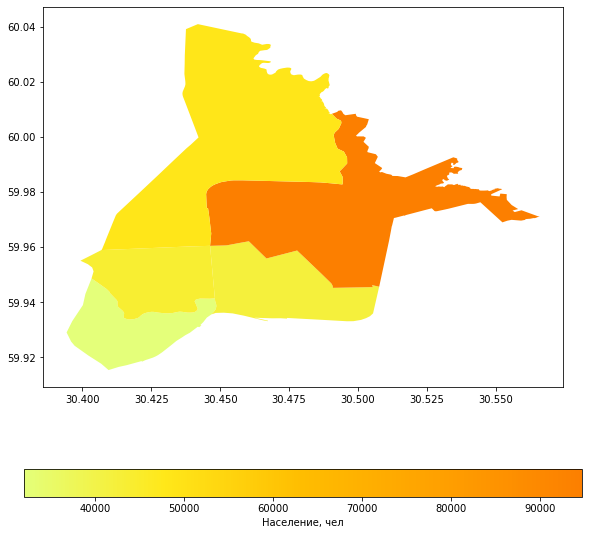

In [46]:
krasnogv_zh_map = gpd.GeoDataFrame(krasnogv)
krasnogv_zh_map.plot(column = 'Население',  cmap='Wistia', legend=True, figsize=[10,10], legend_kwds={'label': "Население, чел", 'orientation': "horizontal"})

Далее в удобной табличной форме собираем данные по победителям в отдельных округах и тоже визуализируем на карте.

# Победители выборов по округам (ну то есть очевидный победитеЛЬ)

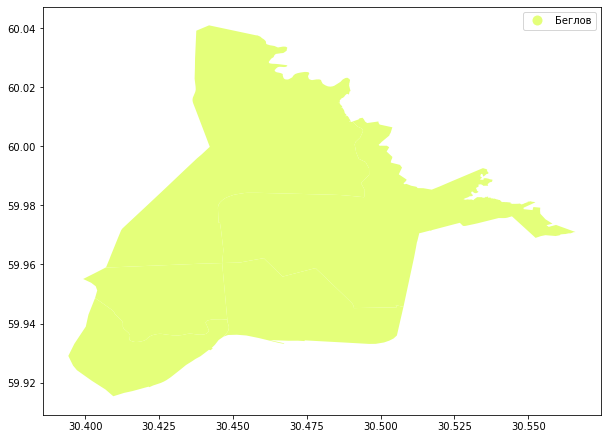

In [35]:
krasnogv_win_map = gpd.GeoDataFrame(krasnogv)
krasnogv_win_map.plot(column = 'Победитель по округу',  cmap='Wistia', legend=True, figsize=[10,10])


Ну и, наконец, покажем на карте зависимость явки избирателей на выборы в зависимости от округа проживания, для чего предварительно соберем в сводную таблицу данные по явке, полученные ранее.

# Визуализация процентной явки избирателей по округам Красногвардейского района:

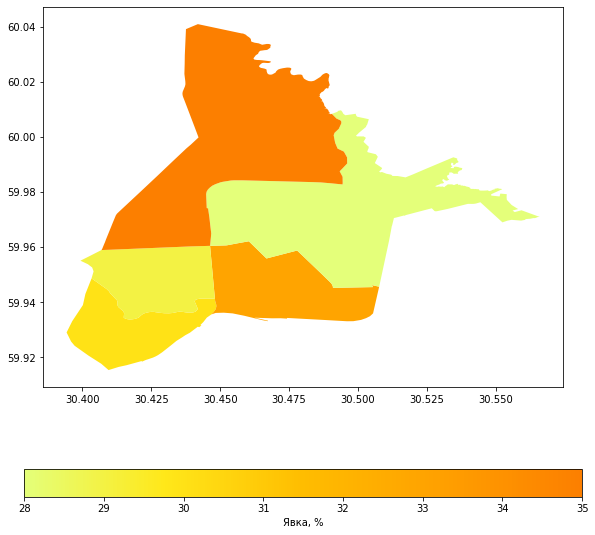

In [37]:
krasnogv_ap_map = gpd.GeoDataFrame(krasnogv)
krasnogv_ap_map.plot(column = 'Явка',  cmap='Wistia', legend=True, figsize=[10,10],  legend_kwds={'label': "Явка, %", 'orientation': "horizontal"})